In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hezamali","key":"c2d35b7553c6e4900d29b12821149512"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                      title                                 size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------  -----  -------------------  -------------  ---------  ---------------  
mrsimple07/restaurants-revenue-prediction                Restaurants Revenue Prediction        42KB  2024-01-17 13:43:00            859         24  1.0              
hummaamqaasim/jobs-in-data                               Jobs and Salaries in Data Science     76KB  2023-12-25 20:03:32           7635        151  1.0              
nelgiriyewithana/new-york-housing-market                 New York Housing Market              271KB  2024-01-06 16:41:00           2523         74  1.0              
rafsunahmad/best-country-to-live-in-2024                 Best Country to Live In 2024           7KB  2024-01-04 12:59:51           1103         32  1.0              
nelg

In [6]:
!kaggle datasets download -d naifaganadily/fun-to-imagine-with-richard-feynman-video-clips

 95% 385M/403M [00:01<00:00, 263MB/s]
100% 403M/403M [00:01<00:00, 258MB/s]


In [7]:
! mkdir tts_data
! mkdir tts_data/steroe_wavs
! unzip fun-to-imagine-with-richard-feynman-video-clips.zip -d tts_data/steroe_wavs
! mkdir tts
! mkdir tts/wavs

Archive:  fun-to-imagine-with-richard-feynman-video-clips.zip
  inflating: tts_data/steroe_wavs/clip0.wav  
  inflating: tts_data/steroe_wavs/clip1.wav  
  inflating: tts_data/steroe_wavs/clip10.wav  
  inflating: tts_data/steroe_wavs/clip100.wav  
  inflating: tts_data/steroe_wavs/clip101.wav  
  inflating: tts_data/steroe_wavs/clip102.wav  
  inflating: tts_data/steroe_wavs/clip103.wav  
  inflating: tts_data/steroe_wavs/clip104.wav  
  inflating: tts_data/steroe_wavs/clip105.wav  
  inflating: tts_data/steroe_wavs/clip106.wav  
  inflating: tts_data/steroe_wavs/clip107.wav  
  inflating: tts_data/steroe_wavs/clip108.wav  
  inflating: tts_data/steroe_wavs/clip109.wav  
  inflating: tts_data/steroe_wavs/clip11.wav  
  inflating: tts_data/steroe_wavs/clip110.wav  
  inflating: tts_data/steroe_wavs/clip111.wav  
  inflating: tts_data/steroe_wavs/clip112.wav  
  inflating: tts_data/steroe_wavs/clip113.wav  
  inflating: tts_data/steroe_wavs/clip114.wav  
  inflating: tts_data/steroe_wav

In [8]:
!pip install -U pip
!pip install TTS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 71.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 106.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 20.8 MB/s eta 0:00:00
     ━

In [9]:
!pip install pydub

In [10]:
import os
files = []
for dirname, _, filenames in os.walk('/content/tts_data/steroe_wavs'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))



In [15]:
!pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 53.5 MB/s eta 0:00:00


In [16]:
import speech_recognition as sr
from tqdm import tqdm
# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()
files_text = []
rec_files = []
# Reading Audio file as source
# listening the audio file and store in audio_text variable
for file in tqdm(files):
    with sr.AudioFile(file) as source:

        audio_text = r.listen(source)

    # recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
        try:

            # using google speech recognition
            text = r.recognize_google(audio_text)
            #print(f'Converting audio transcripts into text ... file: {file}')
            files_text.append(text)
            rec_files.append(file.split("/")[-1])
        except:
             print(f'Sorry.. run again...file: {file}')

print(f"{len(rec_files)} file recgnaized of {len(files)} files")

  2%|▏         | 8/401 [00:27<23:42,  3.62s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip265.wav


  2%|▏         | 10/401 [00:35<23:07,  3.55s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip245.wav


  4%|▎         | 15/401 [00:51<20:25,  3.18s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip273.wav


  9%|▊         | 35/401 [02:17<26:53,  4.41s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip198.wav


 10%|▉         | 39/401 [02:32<23:44,  3.93s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip21.wav


 10%|▉         | 40/401 [02:36<23:07,  3.84s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip234.wav


 12%|█▏        | 48/401 [03:09<23:53,  4.06s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip278.wav


 13%|█▎        | 53/401 [03:22<13:30,  2.33s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip161.wav


 16%|█▌        | 63/401 [04:08<21:42,  3.85s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip299.wav


 17%|█▋        | 67/401 [04:25<21:43,  3.90s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip289.wav


 17%|█▋        | 69/401 [04:34<23:38,  4.27s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip307.wav


 24%|██▎       | 95/401 [06:03<21:48,  4.28s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip267.wav


 24%|██▍       | 96/401 [06:07<21:36,  4.25s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip292.wav


 30%|███       | 122/401 [08:02<16:38,  3.58s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip387.wav


 33%|███▎      | 131/401 [08:37<17:28,  3.88s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip41.wav


 34%|███▎      | 135/401 [08:55<18:57,  4.28s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip22.wav


 35%|███▍      | 140/401 [09:13<15:32,  3.57s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip235.wav
Sorry.. run again...file: /content/tts_data/steroe_wavs/clip330.wav


 35%|███▌      | 142/401 [09:16<11:37,  2.69s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip27.wav


 36%|███▌      | 145/401 [09:31<16:53,  3.96s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip374.wav


 37%|███▋      | 148/401 [09:46<19:35,  4.65s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip325.wav


 39%|███▊      | 155/401 [10:17<15:58,  3.90s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip368.wav


 39%|███▉      | 156/401 [10:21<15:36,  3.82s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip327.wav


 43%|████▎     | 172/401 [11:28<12:30,  3.28s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip400.wav


 44%|████▎     | 175/401 [11:42<15:31,  4.12s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip396.wav


 46%|████▌     | 185/401 [12:23<15:24,  4.28s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip345.wav


 47%|████▋     | 190/401 [12:47<17:02,  4.85s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip248.wav


 49%|████▉     | 196/401 [13:07<12:10,  3.56s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip313.wav


 53%|█████▎    | 214/401 [14:14<10:29,  3.37s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip91.wav


 54%|█████▎    | 215/401 [14:18<10:44,  3.46s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip203.wav


 60%|█████▉    | 239/401 [16:05<14:06,  5.23s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip362.wav


 68%|██████▊   | 274/401 [18:59<09:54,  4.68s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip356.wav


 71%|███████   | 285/401 [19:46<08:41,  4.50s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip211.wav


 73%|███████▎  | 291/401 [20:15<08:43,  4.76s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip50.wav


 79%|███████▉  | 316/401 [22:01<06:29,  4.58s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip268.wav


 82%|████████▏ | 328/401 [22:49<03:38,  2.99s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip399.wav


 84%|████████▍ | 337/401 [23:32<04:53,  4.59s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip39.wav


 86%|████████▌ | 345/401 [24:10<04:25,  4.74s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip223.wav


 88%|████████▊ | 354/401 [24:45<02:50,  3.63s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip314.wav


 89%|████████▉ | 356/401 [24:55<03:21,  4.48s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip42.wav


 93%|█████████▎| 373/401 [26:14<02:02,  4.38s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip103.wav


 95%|█████████▍| 380/401 [26:48<01:34,  4.52s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip0.wav


 96%|█████████▌| 385/401 [27:10<01:08,  4.28s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip271.wav


 99%|█████████▉| 396/401 [27:55<00:19,  3.99s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip45.wav


 99%|█████████▉| 397/401 [27:59<00:15,  3.95s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip266.wav


100%|█████████▉| 399/401 [28:08<00:08,  4.17s/it]

Sorry.. run again...file: /content/tts_data/steroe_wavs/clip251.wav


100%|██████████| 401/401 [28:17<00:00,  4.23s/it]

355 file recgnaized of 401 files


In [18]:
for text, file in zip(files_text,rec_files):
    with open('/content/tts/transcript.txt', 'a') as f:
        f.write(f'{file}|{text}\n')


In [19]:
from pydub import AudioSegment

with open('/content/tts/transcript.txt', "r", encoding="utf-8") as ttf:
      for line in ttf:
          cols = line.split("|")
          wav_file = f"/content/tts_data/steroe_wavs/{cols[0]}"
          sound = AudioSegment.from_wav(wav_file)
          sound = sound.set_channels(1)
          sound.export(f"/content/tts/wavs/{cols[0]}", format="wav")

Transcript for clip149.wav:
and we're so used to circumstances in which these electrical phenomena are all canceled out everything
Audio for clip149.wav:


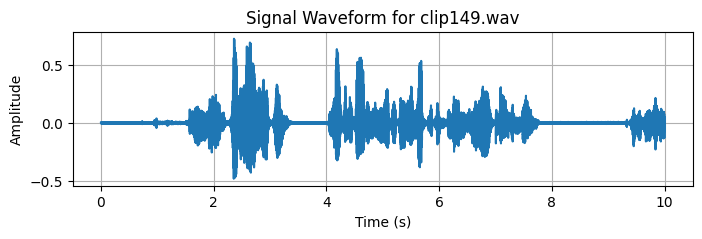

Transcript for clip162.wav:
protons are positive they're inside the nucleus of the atom and they attract electrons opposite charges attractant like charges repel so you have to imagine
Audio for clip162.wav:


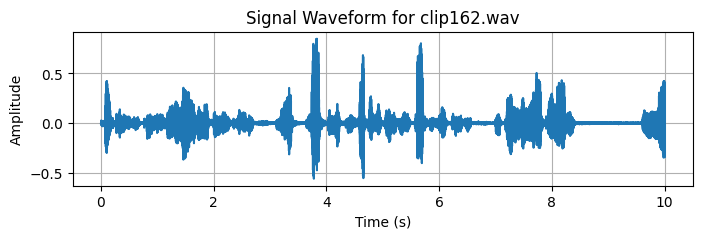

In [23]:

import os
import random
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the folder containing WAV files and the transcript file
wav_folder = '/content/tts/wavs'
transcript_path = '/content/tts/transcript.txt'

# Read the transcript file into a list of lines
with open(transcript_path, 'r') as transcript_file:
    transcript_lines = transcript_file.readlines()

# Shuffle the order of the transcript lines
random.shuffle(transcript_lines)

# Play 5 random items from the shuffled list
num_items_to_play = 2

for i in range(num_items_to_play):
    if i < len(transcript_lines):
        # Get the WAV filename and corresponding transcript line
        line = transcript_lines[i]
        wav_filename, transcript = line.strip().split('|', 1)
        wav_filename = wav_filename.strip()

        # Create the full path to the WAV file
        wav_path = os.path.join(wav_folder, wav_filename)

        # Load the WAV file using librosa
        audio_data, sample_rate = librosa.load(wav_path, sr=None)

        # Display the transcript
        print(f"Transcript for {wav_filename}:")
        print(transcript)

        # Display the audio player to play the WAV file
        print(f"Audio for {wav_filename}:")
        ipd.display(ipd.Audio(data=audio_data, rate=sample_rate))

        # Plot the waveform for the WAV file
        plt.figure(figsize=(8, 2))
        plt.plot(np.arange(len(audio_data)) / sample_rate, audio_data)
        plt.title(f'Signal Waveform for {wav_filename}')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()